# Exploring and Visualizing OpenAQ Data

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import openaq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [5]:
api = openaq.OpenAQ()
resp = api.cities(df=True, limit=10000)

In [6]:
resp.query('city.str.contains("San") and country.str.contains("US")', engine='python')

,country,name,city,count,locations
145,US,Atlanta-Sandy Springs-Marietta,Atlanta-Sandy Springs-Marietta,1894872,13
1383,US,Los Angeles-Long Beach-Santa Ana,Los Angeles-Long Beach-Santa Ana,5539779,32
2028,US,Riverside-San Bernardino-Ontario,Riverside-San Bernardino-Ontario,5416341,42
2094,US,San Antonio,San Antonio,514007,8
2102,US,San Diego-Carlsbad-San Marcos,San Diego-Carlsbad-San Marcos,1002731,11
2108,US,San Francisco Bay Area,San Francisco Bay Area,152929,1
2109,US,San Francisco-Oakland-Fremont,San Francisco-Oakland-Fremont,4637848,15
2111,US,San Jose-Sunnyvale-Santa Clara,San Jose-Sunnyvale-Santa Clara,1306371,8
2114,US,San Juan-Caguas-Guaynabo,San Juan-Caguas-Guaynabo,8475,1
2121,US,San Luis Obispo-Paso Robles,San Luis Obispo-Paso Robles,1605341,34


In [7]:
res = api.locations(city='San Francisco-Oakland-Fremont', df=True)

<AxesSubplot:>

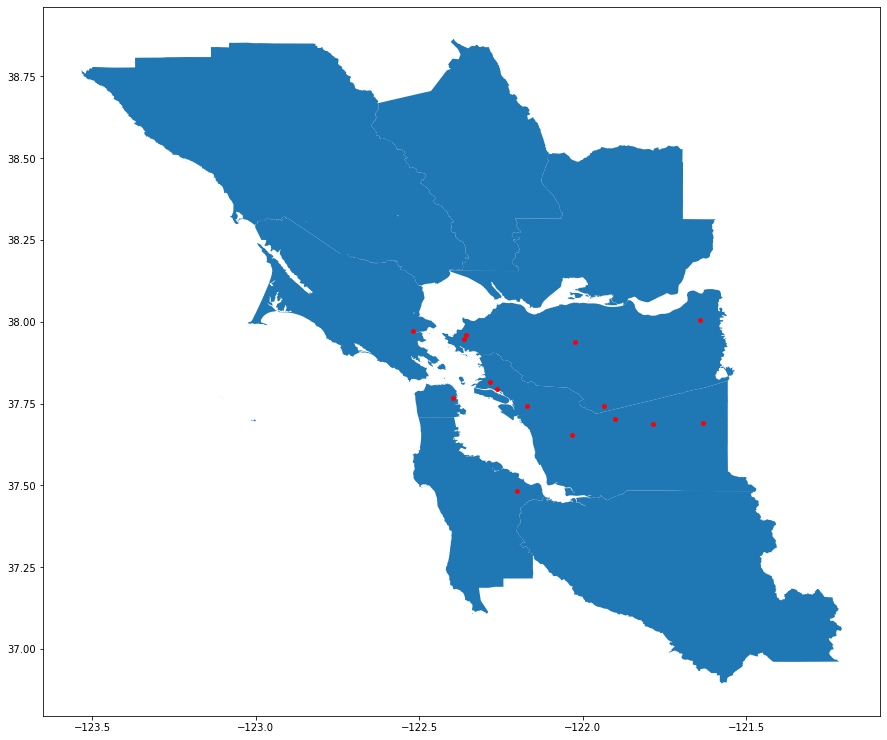

In [16]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(res['coordinates.longitude'], res['coordinates.latitude'])]
gdf = GeoDataFrame(res, geometry=geometry)
world = gpd.read_file("https://data.sfgov.org/api/geospatial/s9wg-vcph?method=export&format=Shapefile")
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15)

In [20]:
measure = api.measurements(city='San Francisco-Oakland-Fremont', parameter='pm25', limit=1000, df=True)

# Print out the statistics on a per-location basiss
measure.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Concord,212.0,7.410377,3.246067,1.0,5.00,7.0,9.0,19.0
Livermore - Rincon,22.0,5.227273,2.990968,-1.0,3.25,5.5,7.0,11.0
Oakland,222.0,8.414414,3.266361,2.0,6.00,8.0,10.0,18.0
Oakland West,221.0,8.447964,3.749334,0.0,6.00,8.0,10.0,23.0
Pleasanton - Owens C,208.0,6.875000,3.068265,-2.0,5.00,7.0,8.0,16.0
Redwood City,206.0,6.354369,4.113708,-2.0,3.00,6.0,9.0,22.0
San Francisco,222.0,8.734234,3.965530,0.0,6.00,8.0,11.0,22.0
San Pablo - Rumrill,205.0,10.512195,3.990933,1.0,8.00,10.0,13.0,23.0
San Rafael,219.0,6.826484,3.970884,-2.0,4.00,6.0,9.0,21.0


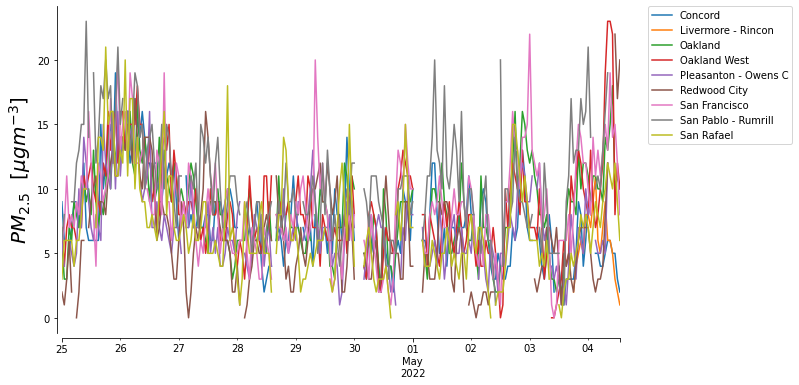

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 6))

for group, df in measure.groupby('location'):
    # Query the data to only get positive values and resample to hourly
    _df = df.query("value >= 0.0").resample('1h').mean()

    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("")
sns.despine(offset=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

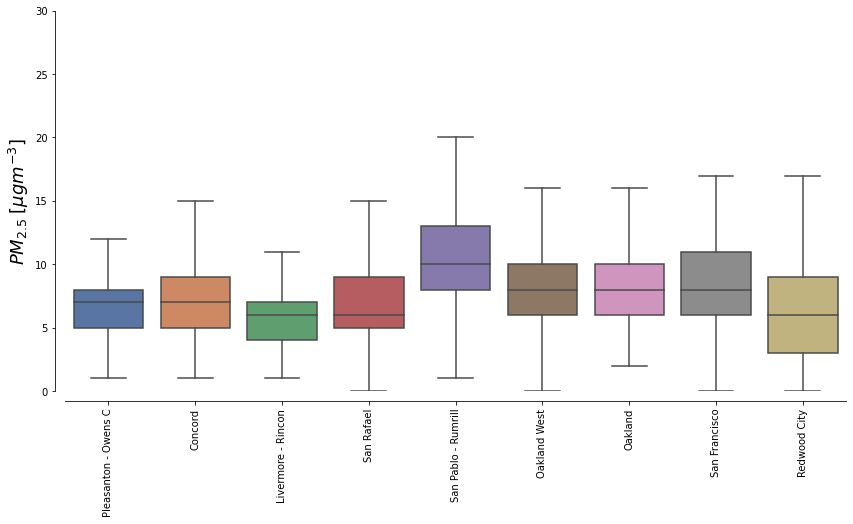

In [24]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='location',
    y='value',
    data=measure.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 30])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("")

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()

In [30]:
sanfrancisco = api.locations(city='San Francisco-Oakland-Fremont', df=True)


sanfrancisco.iloc[0]


id                                                                    1518
country                                                                 US
city                                         San Francisco-Oakland-Fremont
cities                                     [San Francisco-Oakland-Fremont]
location                                                Livermore - Rincon
locations                                             [Livermore - Rincon]
sourceName                                                          AirNow
sourceNames                                                       [AirNow]
sourceType                                                      government
sourceTypes                                                   [government]
firstUpdated                                     2016-03-06 19:00:00+00:00
lastUpdated                                      2022-05-04 20:00:00+00:00
parameters                                             [no2, o3, pm25, bc]
countsByMeasurement      

In [38]:
darkday = api.measurements(location='San Francisco', date_from='2020-09-09', date_to='2020-09-10', df=True, limit=100)
darkday

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-09 17:00:00,San Francisco,pm25,36.000,b'\xc2\xb5g/m\xc2\xb3',US,San Francisco-Oakland-Fremont,2020-09-10 00:00:00+00:00,37.7658,-122.3978
2020-09-09 17:00:00,San Francisco,no2,0.007,ppm,US,San Francisco-Oakland-Fremont,2020-09-10 00:00:00+00:00,37.7658,-122.3978
2020-09-09 17:00:00,San Francisco,o3,0.027,ppm,US,San Francisco-Oakland-Fremont,2020-09-10 00:00:00+00:00,37.7658,-122.3978
2020-09-09 17:00:00,San Francisco,co,0.600,ppm,US,San Francisco-Oakland-Fremont,2020-09-10 00:00:00+00:00,37.7658,-122.3978
2020-09-09 16:00:00,San Francisco,no2,0.010,ppm,US,San Francisco-Oakland-Fremont,2020-09-09 23:00:00+00:00,37.7658,-122.3978
...,...,...,...,...,...,...,...,...,...
2020-09-08 19:00:00,San Francisco,pm25,8.000,b'\xc2\xb5g/m\xc2\xb3',US,San Francisco-Oakland-Fremont,2020-09-09 02:00:00+00:00,37.7658,-122.3978
2020-09-08 17:00:00,San Francisco,no2,0.007,ppm,US,San Francisco-Oakland-Fremont,2020-09-09 00:00:00+00:00,37.7658,-122.3978
2020-09-08 17:00:00,San Francisco,co,0.310,ppm,US,San Francisco-Oakland-Fremont,2020-09-09 00:00:00+00:00,37.7658,-122.3978
